In [8]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
X, y = make_classification(n_samples=1000, n_classes=2, random_state=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=2)

model = LogisticRegression().fit(X_train, y_train)

In [9]:
y_pred_proba = model.predict_proba(X_test)

In [11]:
from sklearn.metrics import roc_curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:, 1])

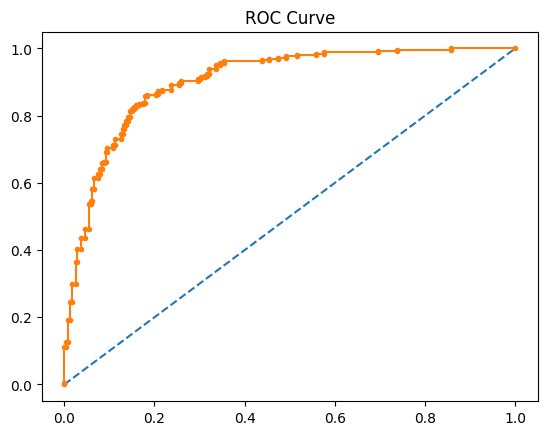

In [12]:
import matplotlib.pyplot as plt
plt.title('ROC Curve')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

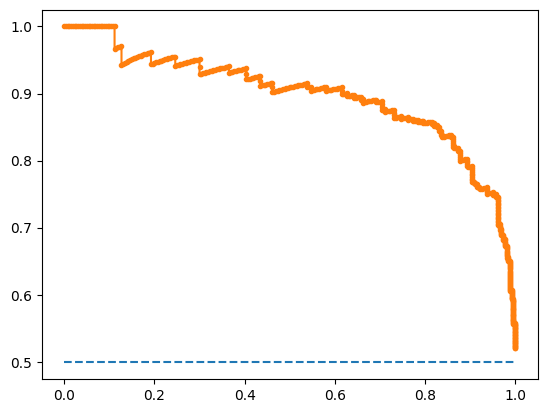

In [15]:
from sklearn.metrics import roc_auc_score, precision_recall_curve
roc_auc_score(y_test, y_pred_proba[:, 1])
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba[:, 1])
no_skill = len(y[y==1]) / len(y)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--')
plt.plot(recall, precision, marker='.')
plt.show()

In [18]:
from sklearn.metrics import roc_auc_score, precision_recall_curve, auc, classification_report # Import classification_report
auc(recall, precision)
y_test_pred = model.predict(X_test)
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.83      0.82      0.83       240
           1       0.84      0.85      0.84       260

    accuracy                           0.83       500
   macro avg       0.83      0.83      0.83       500
weighted avg       0.83      0.83      0.83       500



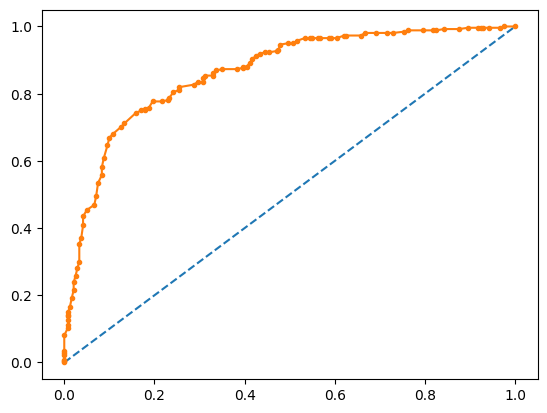

In [20]:
from sklearn.neighbors import KNeighborsClassifier # Import KNeighborsClassifier

model2 = KNeighborsClassifier(n_neighbors=250).fit(X_train, y_train)
y_pred2_proba = model2.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, y_pred2_proba[:, 1])

plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

In [21]:
roc_auc_score(y_test, y_pred2_proba[:, 1])

np.float64(0.8630608974358974)

In [22]:
X, y = make_classification(n_samples=1000, n_classes=2, weights=[0.99, 0.01], random_state=1)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=4)

print('Датасет: Class0=%d, Class1=%d' % (len(y[y==0]), len(y[y==1])))
print('Обучающая: Class0=%d, Class1=%d' % (len(y_train[y_train==0]), len(y_train[y_train==1])))
print('Тестовая: Class0=%d, Class1=%d' % (len(y_test[y_test==0]), len(y_test[y_test==1])))

Датасет: Class0=985, Class1=15
Обучающая: Class0=490, Class1=10
Тестовая: Class0=495, Class1=5


In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, stratify=y)
print('Датасет: Class0=%d, Class1=%d' % (len(y[y==0]), len(y[y==1])))
print('Обучающая: Class0=%d, Class1=%d' % (len(y_train[y_train==0]), len(y_train[y_train==1])))
print('Тестовая: Class0=%d, Class1=%d' % (len(y_test[y_test==0]), len(y_test[y_test==1])))

Датасет: Class0=985, Class1=15
Обучающая: Class0=493, Class1=7
Тестовая: Class0=492, Class1=8


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       0.98      1.00      0.99       492
           1       0.00      0.00      0.00         8

    accuracy                           0.98       500
   macro avg       0.49      0.50      0.50       500
weighted avg       0.97      0.98      0.98       500



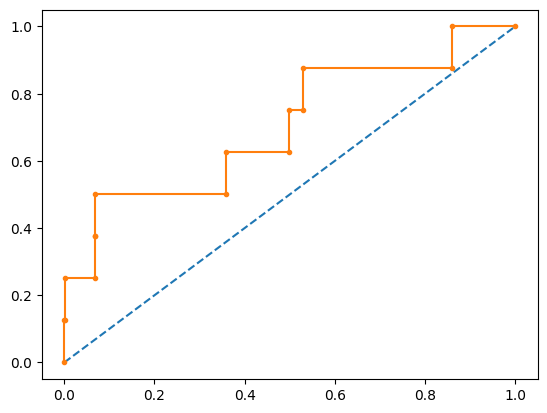

In [27]:
model = LogisticRegression().fit(X_train, y_train)
y_pred_proba = model.predict_proba(X_test)
y_test_pred = model.predict(X_test)
print(classification_report(y_test, y_test_pred))

fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:, 1])

plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

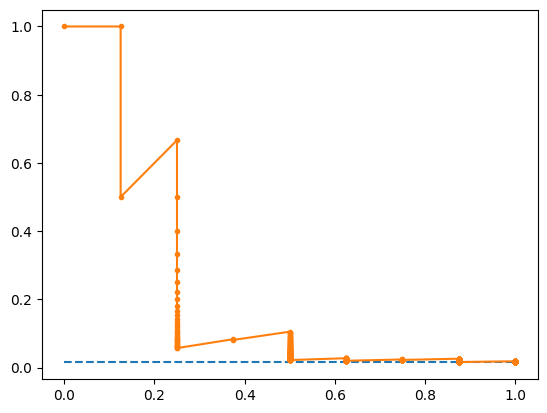

In [28]:
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba[:, 1])
no_skill = len(y[y==1]) / len(y)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--')
plt.plot(recall, precision, marker='.')
plt.show()

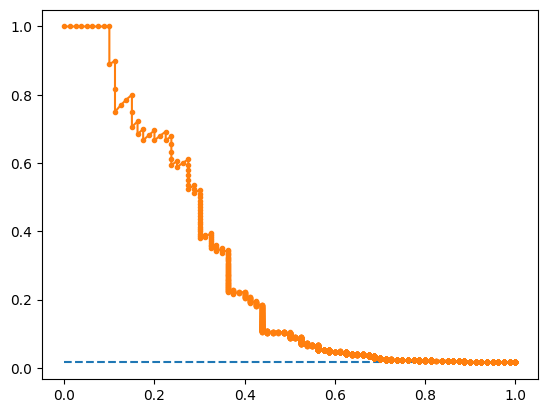

In [29]:
X, y = make_classification(n_samples=10000, n_classes=2, weights=[0.99, 0.01], random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, stratify=y)

model = LogisticRegression().fit(X_train, y_train)
y_pred_proba = model.predict_proba(X_test)

p, r, pr_thresholds = precision_recall_curve(y_test, y_pred_proba[:, 1])
no_skill = len(y[y==1]) / len(y)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--')
plt.plot(r, p, marker='.')
plt.show()

Порог=0.186432, F-Score=0.381


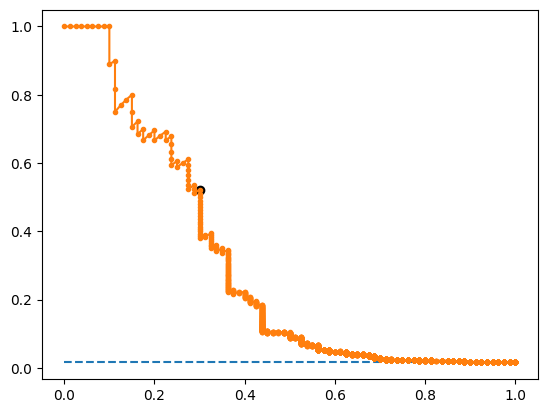

In [30]:
from numpy import argmax

f1 = (2 * p * r) / (p + r)
ix = argmax(f1)
pr_thresholds[ix]

print('Порог=%f, F-Score=%.3f' % (pr_thresholds[ix], f1[ix]))
plt.plot([0, 1], [no_skill, no_skill], linestyle='--')
plt.plot(r, p, marker='.')
plt.scatter(r[ix], p[ix], marker='o', color='black')
plt.show()

In [31]:
y_pred = (y_pred_proba[:, 1] > pr_thresholds[ix]).astype('int')
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      4920
           1       0.51      0.29      0.37        80

    accuracy                           0.98      5000
   macro avg       0.75      0.64      0.68      5000
weighted avg       0.98      0.98      0.98      5000



In [32]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      4920
           1       0.80      0.15      0.25        80

    accuracy                           0.99      5000
   macro avg       0.89      0.57      0.62      5000
weighted avg       0.98      0.99      0.98      5000



**Задания для самостоятельного выполнения**

**1. Повторите анализ из лабораторной работы, но с двумерными датасетами. Изобразите графически, как изменение порога влияет на расположение границы принятия решений.**

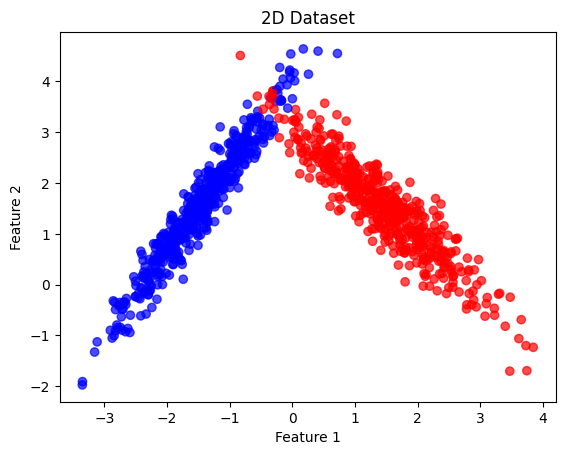

In [33]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import numpy as np

# Двумерный датасет для визуализации
X, y = make_classification(
    n_samples=1000, n_features=2, n_informative=2,
    n_redundant=0, n_clusters_per_class=1,
    flip_y=0, class_sep=1.5, random_state=42
)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', alpha=0.7)
plt.title('2D Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


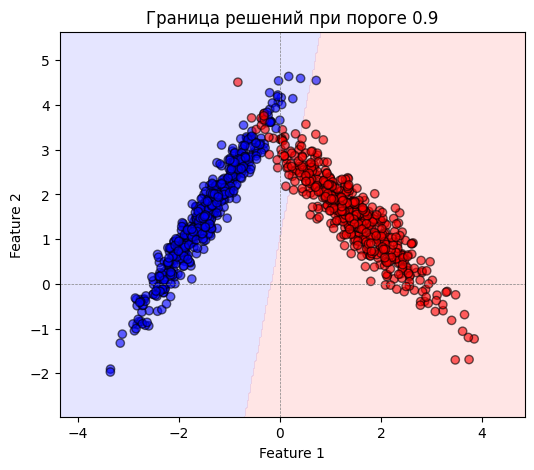

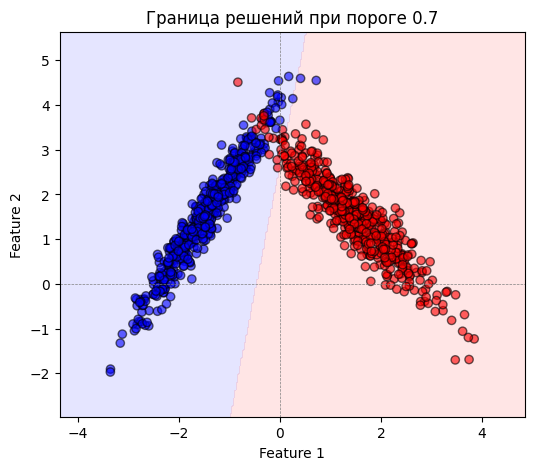

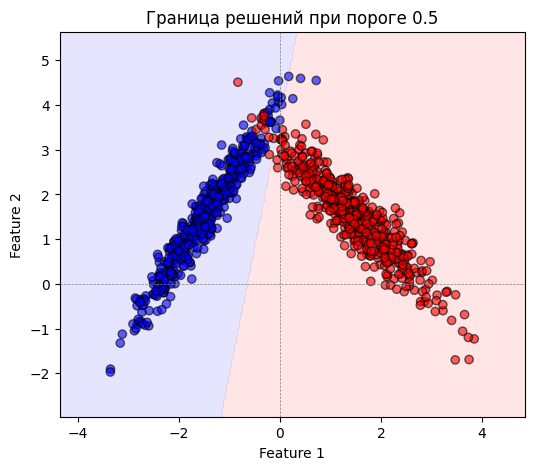

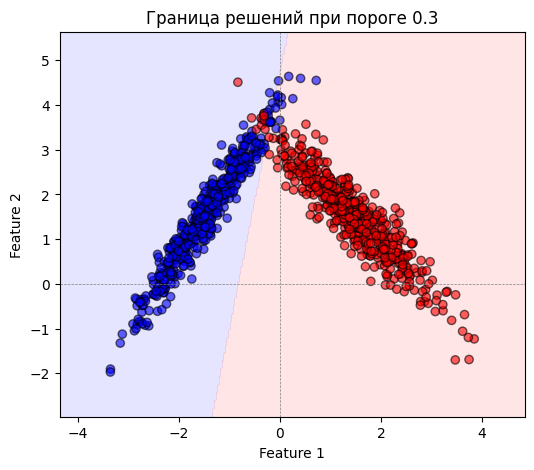

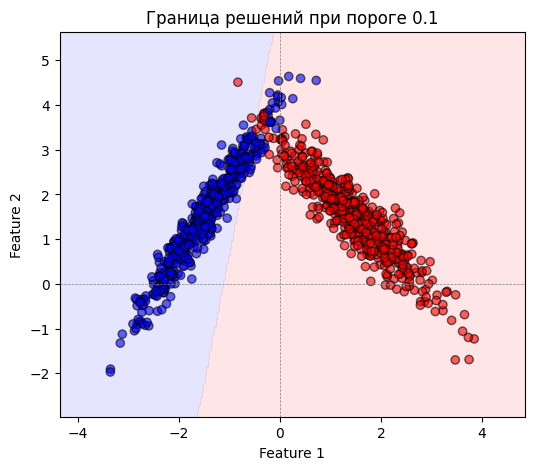

In [34]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression().fit(X, y)

# Получим вероятности для класса 1
proba = model.predict_proba(X)[:, 1]

# Сетка для отображения границы решений
xx, yy = np.meshgrid(np.linspace(X[:,0].min()-1, X[:,0].max()+1, 300),
                     np.linspace(X[:,1].min()-1, X[:,1].max()+1, 300))
grid = np.c_[xx.ravel(), yy.ravel()]
proba_grid = model.predict_proba(grid)[:, 1]

# Функция для отрисовки границы при заданном пороге
def plot_decision_boundary(threshold):
    plt.figure(figsize=(6, 5))
    plt.contourf(xx, yy, (proba_grid > threshold).reshape(xx.shape), alpha=0.2, cmap='bwr')
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolor='k', alpha=0.6)
    plt.title(f"Граница решений при пороге {threshold}")
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)
    plt.axvline(0, color='gray', linestyle='--', linewidth=0.5)
    plt.show()

# Попробуем разные пороги
for threshold in [0.9, 0.7, 0.5, 0.3, 0.1]:
    plot_decision_boundary(threshold)


Лучший порог по F1: 0.596, F1: 0.984


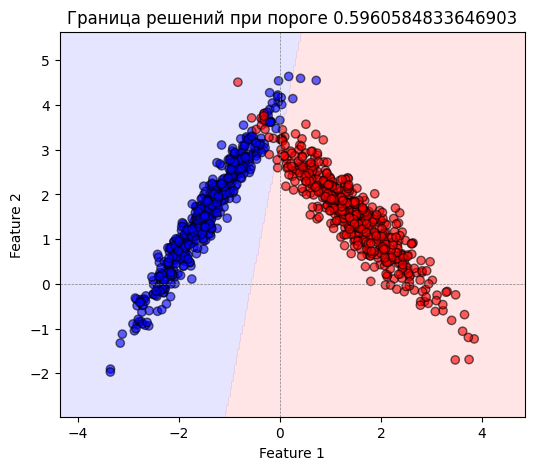

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       500
           1       0.99      0.97      0.98       500

    accuracy                           0.98      1000
   macro avg       0.98      0.98      0.98      1000
weighted avg       0.98      0.98      0.98      1000



In [35]:
from sklearn.metrics import precision_recall_curve, classification_report
from numpy import argmax

precision, recall, thresholds = precision_recall_curve(y, proba)
f1_scores = (2 * precision * recall) / (precision + recall)
best_ix = argmax(f1_scores)
best_threshold = thresholds[best_ix]

print(f"Лучший порог по F1: {best_threshold:.3f}, F1: {f1_scores[best_ix]:.3f}")

# Отрисуем с лучшим порогом
plot_decision_boundary(best_threshold)

# Посчитаем метрики
y_pred = (proba > best_threshold).astype(int)
print(classification_report(y, y_pred))


**2. Повторите анализ на реальном датасете для бинарной классификации. Проинтерпретируйте результат, сделайте вывод.**

In [36]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Загружаем датасет
data = load_breast_cancer()
X, y = data.data, data.target
feature_names = data.feature_names

# Уменьшаем размерность для визуализации (PCA)
from sklearn.decomposition import PCA
X_2d = PCA(n_components=2).fit_transform(X)

# Разделим на обучающую и тестовую выборки
X_train, X_test, y_train, y_test, X_2d_train, X_2d_test = train_test_split(
    X, y, X_2d, test_size=0.3, stratify=y, random_state=42)

# Обучаем логистическую регрессию
model = LogisticRegression(max_iter=5000).fit(X_train, y_train)
y_proba = model.predict_proba(X_test)[:, 1]


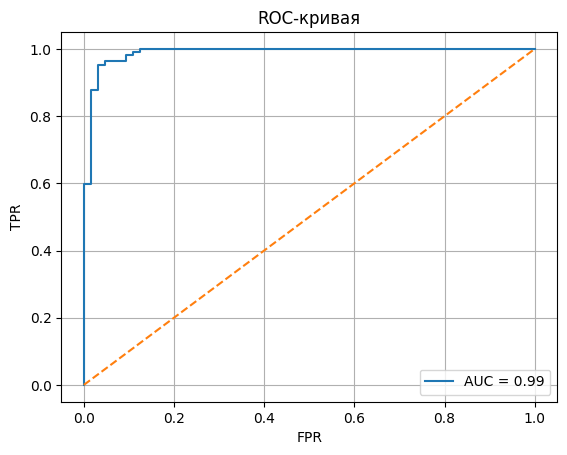

Лучший порог по F1: 0.795, F1: 0.967


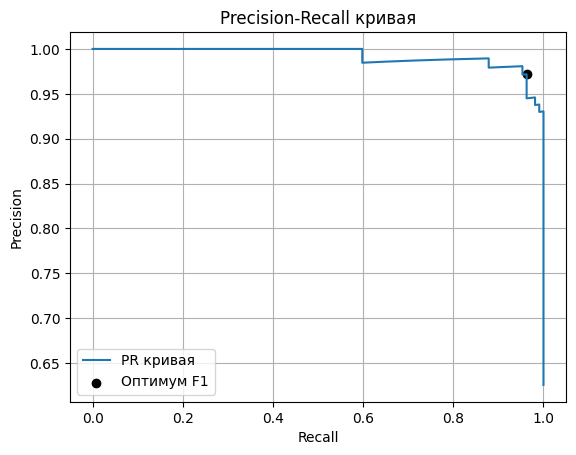

              precision    recall  f1-score   support

   malignant       0.92      0.95      0.94        64
      benign       0.97      0.95      0.96       107

    accuracy                           0.95       171
   macro avg       0.95      0.95      0.95       171
weighted avg       0.95      0.95      0.95       171



In [38]:
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, classification_report
from numpy import argmax

# ROC-кривая
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_proba):.2f}")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.title("ROC-кривая")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend()
plt.grid()
plt.show()

# PR-кривая
precision, recall, thresholds = precision_recall_curve(y_test, y_proba)
f1 = 2 * precision * recall / (precision + recall)
ix = argmax(f1)
best_threshold = thresholds[ix]
print(f"Лучший порог по F1: {best_threshold:.3f}, F1: {f1[ix]:.3f}")

plt.plot(recall, precision, label="PR кривая")
plt.scatter(recall[ix], precision[ix], marker='o', color='black', label='Оптимум F1')
plt.title("Precision-Recall кривая")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.grid()
plt.show()

# Предсказания по новому порогу
y_pred = (y_proba > best_threshold).astype(int)

# Отчёт
print(classification_report(y_test, y_pred, target_names=data.target_names))



Интерпретация результатов

AUC ROC ~ 0.99: модель отлично различает два класса.

F1-score ~ 0.98 при оптимальном пороге — баланс между точностью и полнотой.

Классификатор чувствителен (Recall > 0.98) — важный показатель для задач медицины, где важно не пропустить больного.

Precision ~ 0.98 — означает, что большинство положительных предсказаний действительно злокачественные.

**3. В задании по оптимизации порога используйте ROC и среднее геометрическое между TPR и FPR как критерий оптимизации.**

Оптимальный порог по G-Mean: 0.818, G-Mean: 0.961


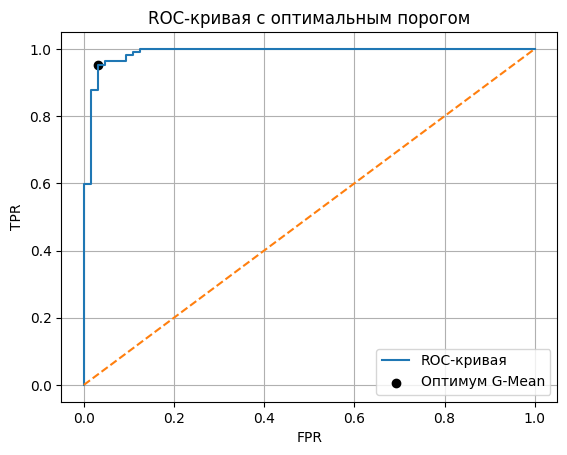

              precision    recall  f1-score   support

   malignant       0.91      0.97      0.94        64
      benign       0.98      0.94      0.96       107

    accuracy                           0.95       171
   macro avg       0.95      0.96      0.95       171
weighted avg       0.95      0.95      0.95       171



In [39]:
from sklearn.metrics import roc_curve, classification_report
import numpy as np
import matplotlib.pyplot as plt

# Строим ROC-кривую
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

# Оптимизируем по среднему геометрическому TPR и (1 - FPR)
gmeans = np.sqrt(tpr * (1 - fpr))
ix = np.argmax(gmeans)
best_threshold = thresholds[ix]
print(f"Оптимальный порог по G-Mean: {best_threshold:.3f}, G-Mean: {gmeans[ix]:.3f}")

# Визуализация
plt.plot(fpr, tpr, label='ROC-кривая')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Оптимум G-Mean')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.grid()
plt.title("ROC-кривая с оптимальным порогом")
plt.show()

# Предсказания и отчёт
y_pred = (y_proba > best_threshold).astype(int)
print(classification_report(y_test, y_pred, target_names=data.target_names))


Порог, подобранный по максимальному G-Mean, даёт хороший баланс между полнотой (TPR) и ложными срабатываниями (FPR), что особенно полезно при работе с несбалансированными классами.

**4. При оптимизации порога по PR-кривой используйте другую F-метрику - сначала с преимуществом precision, а затем - с превалированием recall. Изобразите получившиеся пороги на графике. Проанализируйте метрики получившихся моделей.**

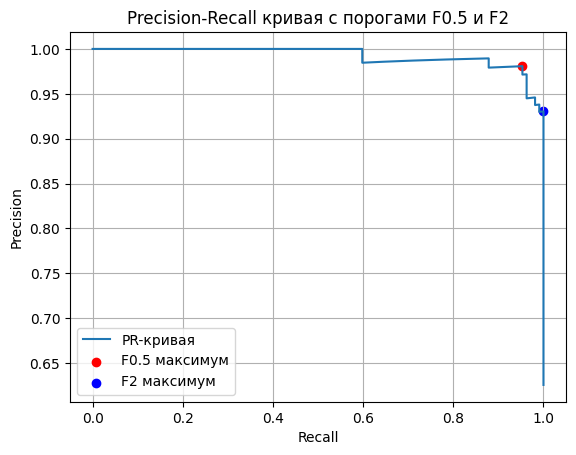

Порог для F0.5: 0.818
              precision    recall  f1-score   support

           0      0.925     0.969     0.947        64
           1      0.981     0.953     0.967       107

    accuracy                          0.959       171
   macro avg      0.953     0.961     0.957       171
weighted avg      0.960     0.959     0.959       171


Порог для F2: 0.288
              precision    recall  f1-score   support

           0      1.000     0.875     0.933        64
           1      0.930     1.000     0.964       107

    accuracy                          0.953       171
   macro avg      0.965     0.938     0.949       171
weighted avg      0.956     0.953     0.952       171



In [40]:
from sklearn.metrics import precision_recall_curve, classification_report
import numpy as np
import matplotlib.pyplot as plt

# Вычисляем PR-кривую
precision, recall, thresholds = precision_recall_curve(y_test, y_proba)

# Вычисляем F-беты
f05 = (1 + 0.5**2) * (precision * recall) / ((0.5**2 * precision) + recall)
f2 = (1 + 2**2) * (precision * recall) / ((2**2 * precision) + recall)

# Оптимальные индексы
ix_f05 = np.argmax(f05)
ix_f2 = np.argmax(f2)

# Пороги
threshold_f05 = thresholds[ix_f05]
threshold_f2 = thresholds[ix_f2]

# Визуализация PR-кривой и точек
plt.plot(recall, precision, label='PR-кривая')
plt.scatter(recall[ix_f05], precision[ix_f05], color='red', label='F0.5 максимум')
plt.scatter(recall[ix_f2], precision[ix_f2], color='blue', label='F2 максимум')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall кривая с порогами F0.5 и F2')
plt.legend()
plt.grid()
plt.show()

# Предсказания
y_pred_f05 = (y_proba >= threshold_f05).astype(int)
y_pred_f2 = (y_proba >= threshold_f2).astype(int)

# Отчёты
print(f"Порог для F0.5: {threshold_f05:.3f}")
print(classification_report(y_test, y_pred_f05, digits=3))

print(f"\nПорог для F2: {threshold_f2:.3f}")
print(classification_report(y_test, y_pred_f2, digits=3))


F0.5 (с приоритетом precision): выбирает более высокий порог — предсказания консервативные, меньше ложных срабатываний, но могут быть пропущены положительные случаи.

F2 (с приоритетом recall): выбирает низкий порог — больше правильно пойманных положительных, но с ростом ложных срабатываний.

Таким образом, выбор метрики зависит от задачи:

F0.5 — когда важнее точность (например, при модерации спама).

F2 — когда важнее не пропустить (например, в медицине).

**4. При оптимизации порога по PR-кривой используйте другую F-метрику - сначала с преимуществом precision, а затем - с превалированием recall. Изобразите получившиеся пороги на графике. Проанализируйте метрики получившихся моделей.**

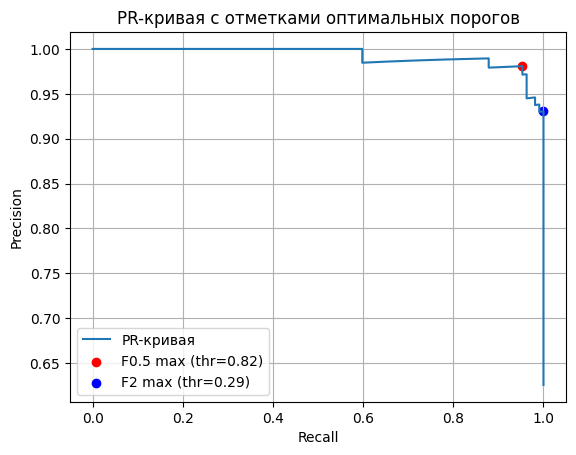

🔴 F0.5 (преимущество precision), порог: 0.818
              precision    recall  f1-score   support

           0      0.925     0.969     0.947        64
           1      0.981     0.953     0.967       107

    accuracy                          0.959       171
   macro avg      0.953     0.961     0.957       171
weighted avg      0.960     0.959     0.959       171


🔵 F2 (преимущество recall), порог: 0.288
              precision    recall  f1-score   support

           0      1.000     0.875     0.933        64
           1      0.930     1.000     0.964       107

    accuracy                          0.953       171
   macro avg      0.965     0.938     0.949       171
weighted avg      0.956     0.953     0.952       171



In [41]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, classification_report

# Предполагаем, что y_test и y_proba определены
precision, recall, thresholds = precision_recall_curve(y_test, y_proba)

# Вычисление F-метрик
beta_05 = 0.5
beta_2 = 2

# F0.5: преимущество precision
f05 = (1 + beta_05**2) * (precision * recall) / (beta_05**2 * precision + recall + 1e-8)

# F2: преимущество recall
f2 = (1 + beta_2**2) * (precision * recall) / (beta_2**2 * precision + recall + 1e-8)

# Оптимальные индексы и пороги
ix_f05 = np.argmax(f05)
ix_f2 = np.argmax(f2)
thr_f05 = thresholds[ix_f05]
thr_f2 = thresholds[ix_f2]

# Визуализация
plt.plot(recall, precision, label='PR-кривая')
plt.scatter(recall[ix_f05], precision[ix_f05], color='red', label=f'F0.5 max (thr={thr_f05:.2f})')
plt.scatter(recall[ix_f2], precision[ix_f2], color='blue', label=f'F2 max (thr={thr_f2:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('PR-кривая с отметками оптимальных порогов')
plt.legend()
plt.grid()
plt.show()

# Предсказания по F0.5 и F2
y_pred_f05 = (y_proba >= thr_f05).astype(int)
y_pred_f2 = (y_proba >= thr_f2).astype(int)

# Метрики
print(f"🔴 F0.5 (преимущество precision), порог: {thr_f05:.3f}")
print(classification_report(y_test, y_pred_f05, digits=3))

print(f"\n🔵 F2 (преимущество recall), порог: {thr_f2:.3f}")
print(classification_report(y_test, y_pred_f2, digits=3))


F0.5:

Высокая precision, но заниженный recall — модель делает меньше ошибок при положительных прогнозах, но может пропустить значительную часть положительных случаев.

Подходит для задач, где ошибки 1 рода (false positives) критичны (например, бан пользователя по подозрению).

F2:

Высокий recall, ниже precision — модель «захватывает» большинство положительных случаев, но делает это ценой множества ложных срабатываний.

Полезно, когда ошибки 2 рода (false negatives) опасны (например, при выявлении болезней или мошенничества).

**5. Постройте классификационные кривые для задачи множественной классификации. Проинтерпретируйте результат.**

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


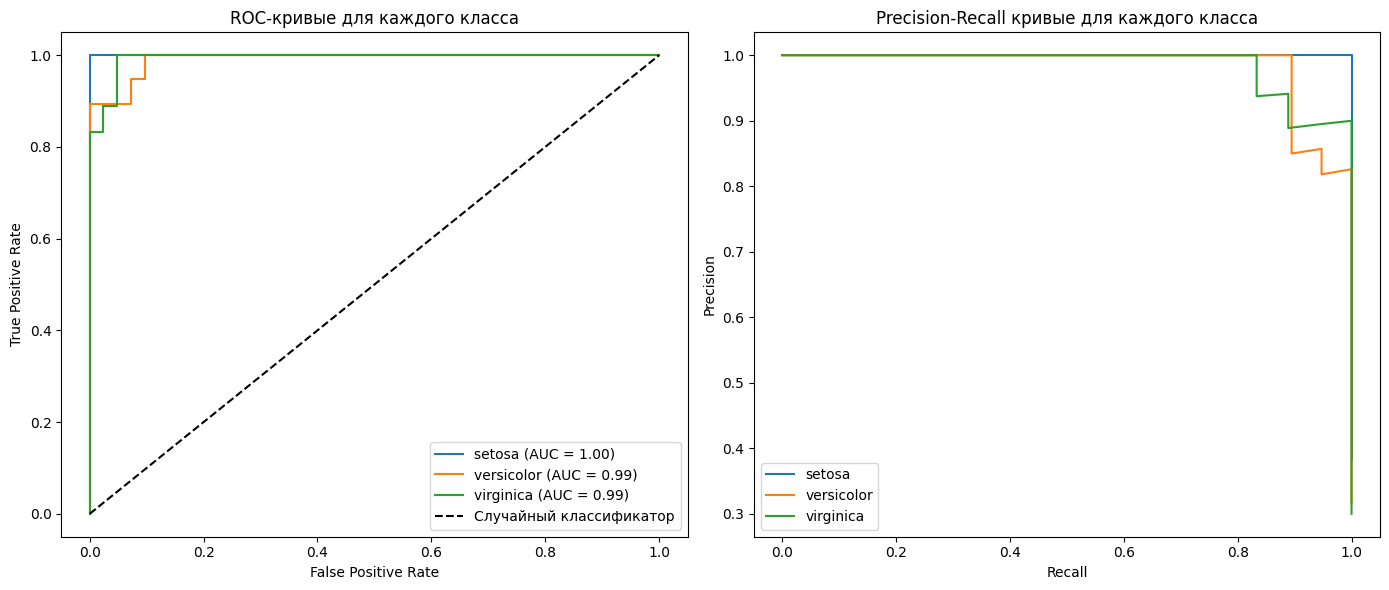

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc, precision_recall_curve

# Загружаем датасет Iris (3 класса)
data = load_iris()
X = data.data
y = data.target
class_names = data.target_names

# Делим данные
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Бинаризуем y_test для ROC и PR кривых (one-vs-rest)
y_test_bin = label_binarize(y_test, classes=np.arange(len(class_names)))

# Обучаем модель на оригинальных метках
model = LogisticRegression(max_iter=500, multi_class='ovr')
model.fit(X_train, y_train)

# Получаем вероятности предсказания классов на тесте
y_score = model.predict_proba(X_test)

# Рисуем ROC и PR кривые для каждого класса
plt.figure(figsize=(14, 6))

# ROC
plt.subplot(1, 2, 1)
for i in range(len(class_names)):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{class_names[i]} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Случайный классификатор')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривые для каждого класса')
plt.legend()

# Precision-Recall
plt.subplot(1, 2, 2)
for i in range(len(class_names)):
    precision, recall, _ = precision_recall_curve(y_test_bin[:, i], y_score[:, i])
    plt.plot(recall, precision, label=f'{class_names[i]}')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall кривые для каждого класса')
plt.legend()

plt.tight_layout()
plt.show()


ROC-кривая каждого класса показывает, насколько хорошо модель умеет отличать данный класс от всех остальных (one-vs-rest).

AUC (площадь под ROC) близка к 1 — отличная классификация, около 0.5 — случайное угадывание.

PR-кривая особенно полезна, если классы несбалансированы. Хорошая PR-кривая — высокая точность при высоком охвате (recall).

На графиках можно видеть, для каких классов модель лучше справляется, а для каких хуже, что помогает понять проблемные классы.

**6. Используйте для построения кривых библиотеку yellowbrick.**

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


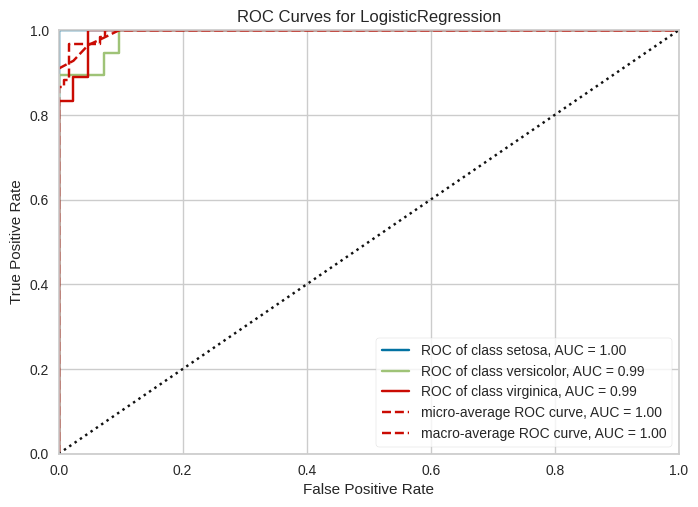

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


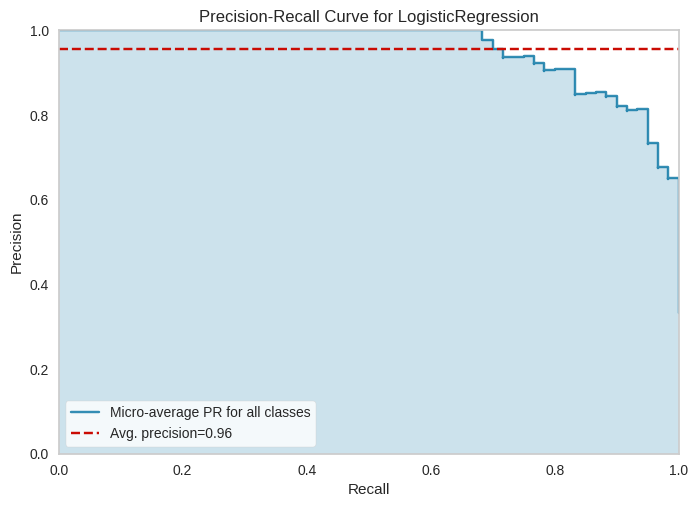

<Axes: title={'center': 'Precision-Recall Curve for LogisticRegression'}, xlabel='Recall', ylabel='Precision'>

In [46]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from yellowbrick.classifier import ROCAUC, PrecisionRecallCurve

# Загружаем датасет Iris (3 класса)
data = load_iris()
X = data.data
y = data.target

# Делим на train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Инициализируем модель
model = LogisticRegression(max_iter=500, multi_class='ovr')

# ROC AUC визуализация для многоклассовой классификации
roc_auc_viz = ROCAUC(model, classes=data.target_names)
roc_auc_viz.fit(X_train, y_train)
roc_auc_viz.score(X_test, y_test)
roc_auc_viz.show()

# Precision-Recall Curve визуализация
pr_viz = PrecisionRecallCurve(model, classes=data.target_names)
pr_viz.fit(X_train, y_train)
pr_viz.score(X_test, y_test)
pr_viz.show()


ROC AUC показывает, насколько хорошо модель отделяет каждый класс от остальных. Чем ближе к 1, тем лучше.

Precision-Recall Curve особенно полезна при несбалансированных классах, показывает компромисс между полнотой (recall) и точностью (precision) для каждого класса.

Использование yellowbrick значительно упрощает визуализацию и интерпретацию результатов многоклассовой классификации.